In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import itertools
import time
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('baseball/MLB Stats.csv')
data.head()

,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,Team,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
0,aardsda01,David Aardsma,215,75,R,R,2004,NL,SFN,San Francisco Giants,...,0,0,0,0,300000,0,0,0,0,0
1,aardsda01,David Aardsma,215,75,R,R,2007,AL,CHA,Chicago White Sox,...,0,0,0,0,387500,0,0,0,0,0
2,aardsda01,David Aardsma,215,75,R,R,2008,AL,BOS,Boston Red Sox,...,0,0,0,1,403250,0,0,0,0,1
3,aardsda01,David Aardsma,215,75,R,R,2009,AL,SEA,Seattle Mariners,...,0,0,0,0,419000,0,0,0,0,0
4,aardsda01,David Aardsma,215,75,R,R,2012,AL,NYA,New York Yankees,...,0,0,0,0,500000,0,0,0,0,0


In [4]:
is_2016 =  data['Season']==2016
is_2016

0        False
1        False
2        False
3        False
4        False
         ...  
28288    False
28289    False
28290    False
28291    False
28292     True
Name: Season, Length: 28293, dtype: bool

In [5]:
data_2016 = data[is_2016]
data_2016.head()

,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,Team,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
15,abadfe01,Fernando Abad,220,73,L,L,2016,AL,BOS,Boston Red Sox,...,0,0,0,0,1250000,0,0,0,0,0
16,abadfe01,Fernando Abad,220,73,L,L,2016,AL,MIN,Minnesota Twins,...,0,0,0,1,1250000,0,0,0,0,1
81,abreujo02,Jose Abreu,255,75,R,R,2016,AL,CHA,Chicago White Sox,...,100,0,47,125,11666667,7,15,0,9,702
117,ackledu01,Dustin Ackley,205,73,L,R,2016,AL,NYA,New York Yankees,...,4,0,8,9,3200000,0,0,0,1,70
124,adamecr01,Cristhian Adames,185,72,B,R,2016,NL,COL,Colorado Rockies,...,17,2,24,47,509500,0,4,3,0,256


In [6]:
data_2016 = data_2016.drop_duplicates(subset=['playerID'], keep=False)
data_2016.head()

,playerID,Player Name,weight,height,bats,throws,Season,League,teamID,Team,...,RBI,SB,BB,SO,salary,IBB,HBP,SH,SF,PA
81,abreujo02,Jose Abreu,255,75,R,R,2016,AL,CHA,Chicago White Sox,...,100,0,47,125,11666667,7,15,0,9,702
117,ackledu01,Dustin Ackley,205,73,L,R,2016,AL,NYA,New York Yankees,...,4,0,8,9,3200000,0,0,0,1,70
124,adamecr01,Cristhian Adames,185,72,B,R,2016,NL,COL,Colorado Rockies,...,17,2,24,47,509500,0,4,3,0,256
132,adamsma01,Matt Adams,245,75,L,R,2016,NL,SLN,St. Louis Cardinals,...,54,0,25,81,1650000,1,2,0,3,328
162,adriaeh01,Ehire Adrianza,170,73,B,R,2016,NL,SFN,San Francisco Giants,...,7,0,2,13,512500,0,2,4,0,71


In [7]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [11]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = data_2016.salary
X = data_2016.drop(columns = ['salary', 'playerID', 'Player Name', 'bats', 'throws', 'Season', 'League', 'teamID',
                           'Team', 'Franchise'], axis = 1)
k = 18
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 18 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  del sys.path[0]


In [15]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(18))
display(df_max.head(18))

,numb_features,RSS,R_squared,features
9,1,2.460153e+16,0.070481,"(RBI,)"
26,2,2.391391e+16,0.096461,"(weight, RBI)"
273,3,2.344846e+16,0.114047,"(weight, RBI, SO)"
1590,4,2.303185e+16,0.129788,"(weight, RBI, BB, SO)"
5295,5,2.262757e+16,0.145063,"(weight, AB, 3B, SO, PA)"
14668,6,2.215402e+16,0.162955,"(weight, G, AB, 3B, SO, PA)"
36087,7,2.190074e+16,0.172525,"(weight, G, AB, 2B, 3B, SO, PA)"
83714,8,2.168366e+16,0.180727,"(height, G, AB, 2B, 3B, RBI, SO, PA)"
108024,9,2.151299e+16,0.187175,"(weight, height, G, AB, 2B, 3B, RBI, SO, PA)"
157567,10,2.140313e+16,0.191326,"(weight, height, G, AB, 2B, 3B, RBI, BB, SO, SH)"


,numb_features,RSS,R_squared,features
9,1,2.460153e+16,0.070481,"(RBI,)"
26,2,2.391391e+16,0.096461,"(weight, RBI)"
273,3,2.344846e+16,0.114047,"(weight, RBI, SO)"
1590,4,2.303185e+16,0.129788,"(weight, RBI, BB, SO)"
5295,5,2.262757e+16,0.145063,"(weight, AB, 3B, SO, PA)"
14668,6,2.215402e+16,0.162955,"(weight, G, AB, 3B, SO, PA)"
36087,7,2.190074e+16,0.172525,"(weight, G, AB, 2B, 3B, SO, PA)"
83714,8,2.168366e+16,0.180727,"(height, G, AB, 2B, 3B, RBI, SO, PA)"
108024,9,2.151299e+16,0.187175,"(weight, height, G, AB, 2B, 3B, RBI, SO, PA)"
157567,10,2.140313e+16,0.191326,"(weight, height, G, AB, 2B, 3B, RBI, BB, SO, SH)"


In [18]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,2.571075e+16,0.028571,"(weight,)",2.460153e+16,0.070481
1,1,2.619389e+16,0.010317,"(height,)",2.460153e+16,0.070481
2,1,2.577244e+16,0.026240,"(G,)",2.460153e+16,0.070481
3,1,2.513295e+16,0.050402,"(AB,)",2.460153e+16,0.070481
4,1,2.511591e+16,0.051046,"(R,)",2.460153e+16,0.070481


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


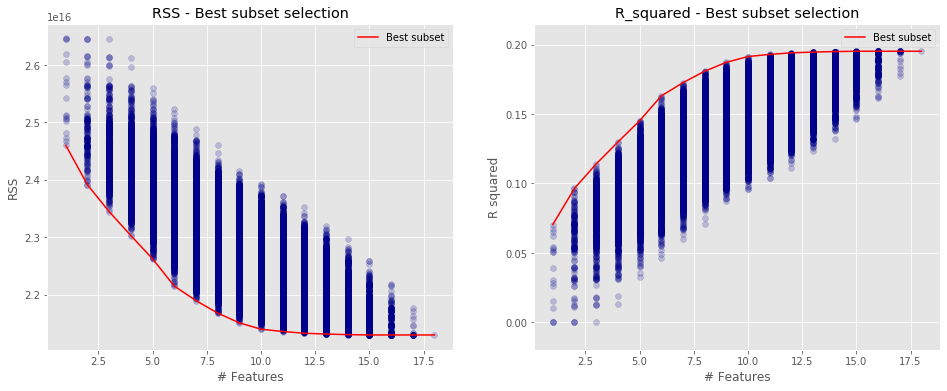

In [20]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()